In [1]:
import pandas as pd
import math
from collections import defaultdict, Counter
from tqdm import tqdm
import dgrec
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from datetime import date
import itertools
import Library_00_Utils as utils

In [2]:
df_v2=pd.concat((utils.pickle_load('Pickle_Files\Genotypes\A_V2'),utils.pickle_load('Pickle_Files\Genotypes\B_V2')))
df_v2=df_v2[df_v2['count_total_geno']>1000]
df_v2_stats=utils.getting_percentage(utils.genotyping_dataframe(df_v2))
df_sorted_v2=df_v2_stats.sort_values(by='Percentage_muta_geno',ascending=False)


### Cumulative distribution

C:\Users\prochett\AppData\Local\Temp\ipykernel_15100\1385096684.py:32: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,100)


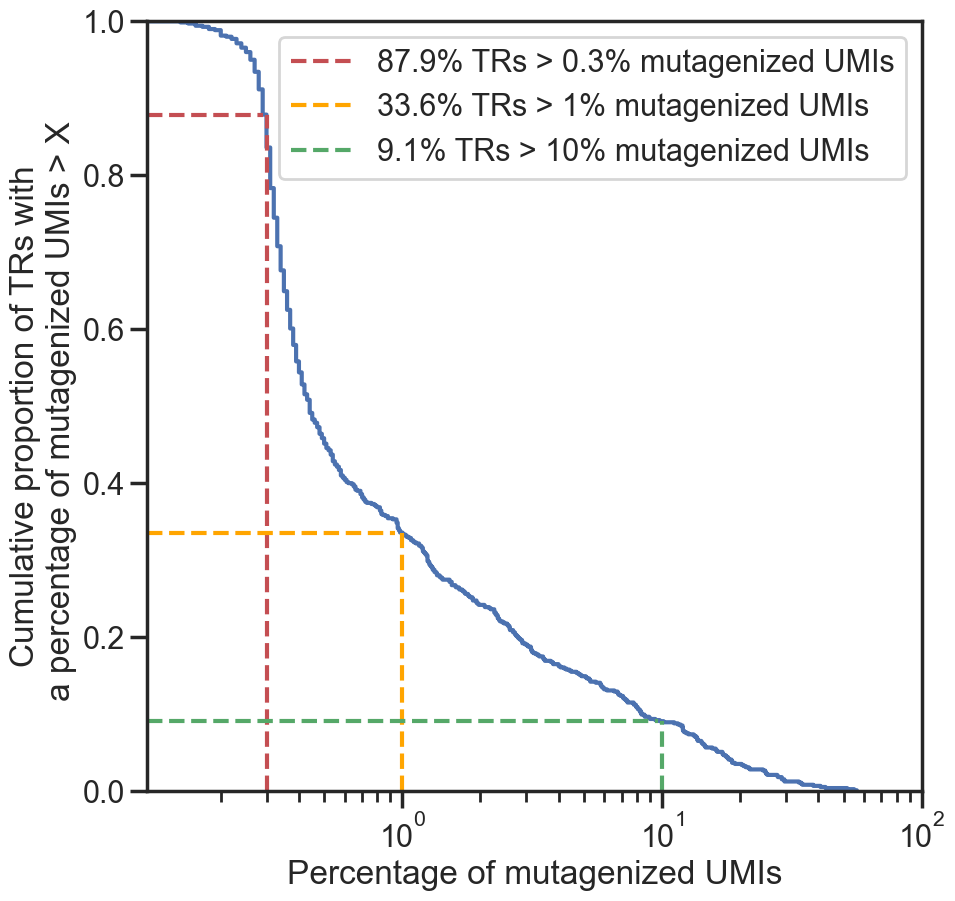

In [4]:
plt.rcParams['svg.fonttype'] = 'none'
df_to_analyze=df_sorted_v2
plt.figure(figsize=(10,10))
sns.set_theme()
sns.set_context("poster")
sns.set_style('white')
sns.set_style("ticks")
sns.ecdfplot(data=df_to_analyze,x='Percentage_muta_geno',complementary=True)
# sns.kdeplot(data=df_to_analyze,x='Percentage_muta_geno')
# plt.yscale('log')
plt.xlabel('Percentage of mutagenized UMIs')
plt.ylabel('Cumulative proportion of TRs with  \na percentage of mutagenized UMIs > X ')
x_1=0.3
x_2=1
x_3=10
y_1=1-len(df_to_analyze[df_to_analyze['Percentage_muta_geno']<x_1])/len(df_to_analyze)
y_2=1-len(df_to_analyze[df_to_analyze['Percentage_muta_geno']<x_2])/len(df_to_analyze)
y_3=1-len(df_to_analyze[df_to_analyze['Percentage_muta_geno']<x_3])/len(df_to_analyze)
x_max_1=0.15
x_max_2=0.32
x_max_3=0.66

plt.axvline(x=x_1,ymax=y_1, color='r', linestyle='--',label=f'{round(100*y_1,1)}% TRs > {x_1}% mutagenized UMIs')
plt.axvline(x=x_2,ymax=y_2, color='orange', linestyle='--',label=f'{round(100*y_2,1)}% TRs > {x_2}% mutagenized UMIs')
plt.axvline(x=x_3,ymax=y_3, color='g', linestyle='--',label=f'{round(100*y_3,1)}% TRs > {x_3}% mutagenized UMIs')
plt.axhline(y=y_1,xmax=x_max_1, color='r', linestyle='--')
plt.axhline(y=y_2,xmax=x_max_2, color='orange', linestyle='--')
plt.axhline(y=y_3,xmax=x_max_3, color='g', linestyle='--',)
plt.legend(loc='upper right')
# plt.title('Cumulative distribution of the mutagenesis percentage')
plt.xscale('log')
plt.xlim(0,100)
plt.savefig(f'Figures/General_Stats_Library/Cumulative_Distribution.png',dpi=600)
plt.savefig(f'Figures/General_Stats_Library/Cumulative_Distribution.svg')

plt.show()


In [5]:
TR_list_v2=list(df_sorted_v2['TR'])
genolist_list_v2=list(df_sorted_v2['geno_list'])
df_muta_v2=pd.DataFrame(utils.base_upstream_downstream(TR_list_v2,genolist_list_v2))

100%|██████████| 702/702 [00:07<00:00, 88.28it/s] 


### Old Base

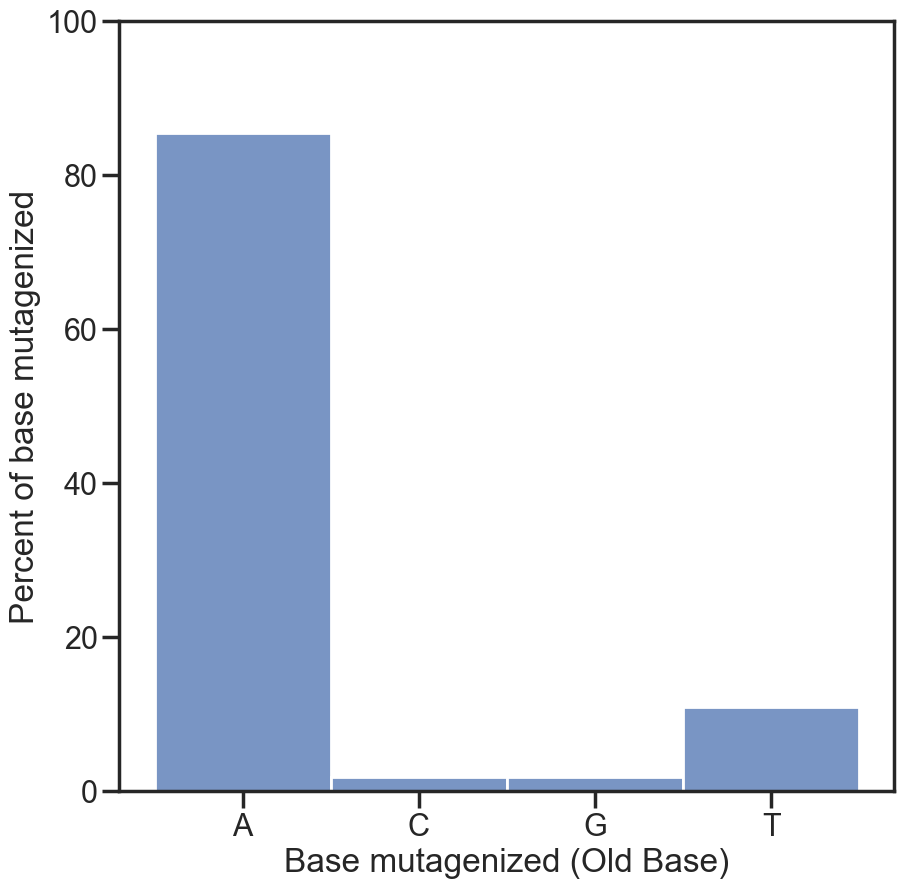

In [6]:
plt.rcParams['svg.fonttype'] = 'none'
df_DGR=df_muta_v2[(df_muta_v2['Old Base'].isin(["A","C","G","T"]))&(df_muta_v2['New Base'].isin(["A","C","G","T"]))]
plt.figure(figsize=(10,10))
sns.set_theme()
sns.set_context("poster")
sns.set_style('white')
sns.set_style('ticks')
sns.histplot(data=df_DGR.sort_values(by='Old Base'),x='Old Base',discrete=True,stat='percent')
plt.ylabel('Percent of base mutagenized')
plt.xlabel('Base mutagenized (Old Base)')
plt.ylim((0,100))
plt.savefig(f'Figures/General_Stats_Library/Histplot_Old_Base.svg')
plt.savefig(f'Figures/General_Stats_Library/Histplot_Old_Base.png',dpi=600)
plt.show()


### New_Base

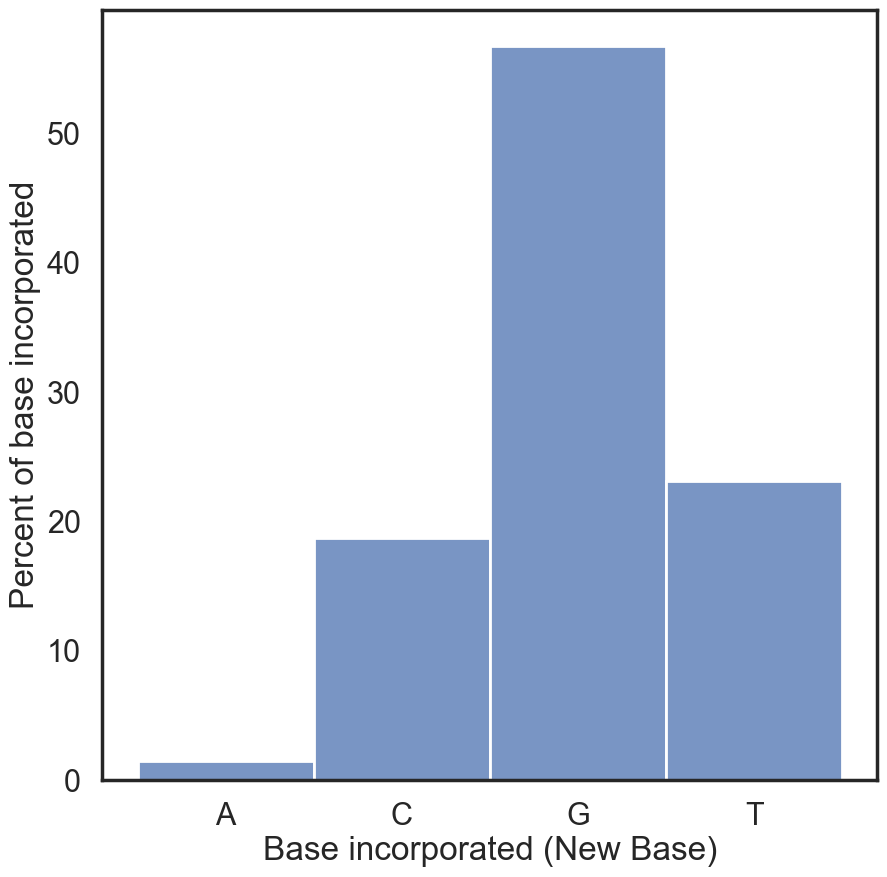

In [7]:
plt.rcParams['svg.fonttype'] = 'none'
plt.figure(figsize=(10,10))
sns.set_theme()
sns.set_context("poster")
sns.set_style('white')
sns.histplot(data=df_DGR.sort_values(by='New Base'),x='New Base',discrete=True,stat='percent')
plt.xlabel('Base incorporated (New Base)')
plt.ylabel('Percent of base incorporated')
plt.savefig(f'Figures/General_Stats_Library/Histplot_New_Base.svg')
plt.savefig(f'Figures/General_Stats_Library/Histplot_New_Base.png',dpi=600)
plt.show()

### Distance between two mutations

In [8]:
def get_distance(genotype):
    mut_list=genotype[0].split(',')
    pos_list=[]
    for mut in mut_list:
        if mut[0]!='-' and mut[-1]!='-':
            # print(mut[1:-1])
            pos_list.append(int(mut[1:-1]))

    dist_list=[]
    for k in range(len(pos_list)-1):
        dist_list.append(pos_list[k+1]-pos_list[k])
    return dist_list*genotype[1]

geno_list_list=[]
for geno_list in list(df_sorted_v2['geno_list']):
    geno_list_list.extend(geno_list)

distance_list=[]
for genotype in tqdm(geno_list_list):
    if genotype[0]!='':
        distance_list.extend(get_distance(genotype))
        


  0%|          | 0/323420 [00:00<?, ?it/s]

100%|██████████| 323420/323420 [00:00<00:00, 351582.45it/s]


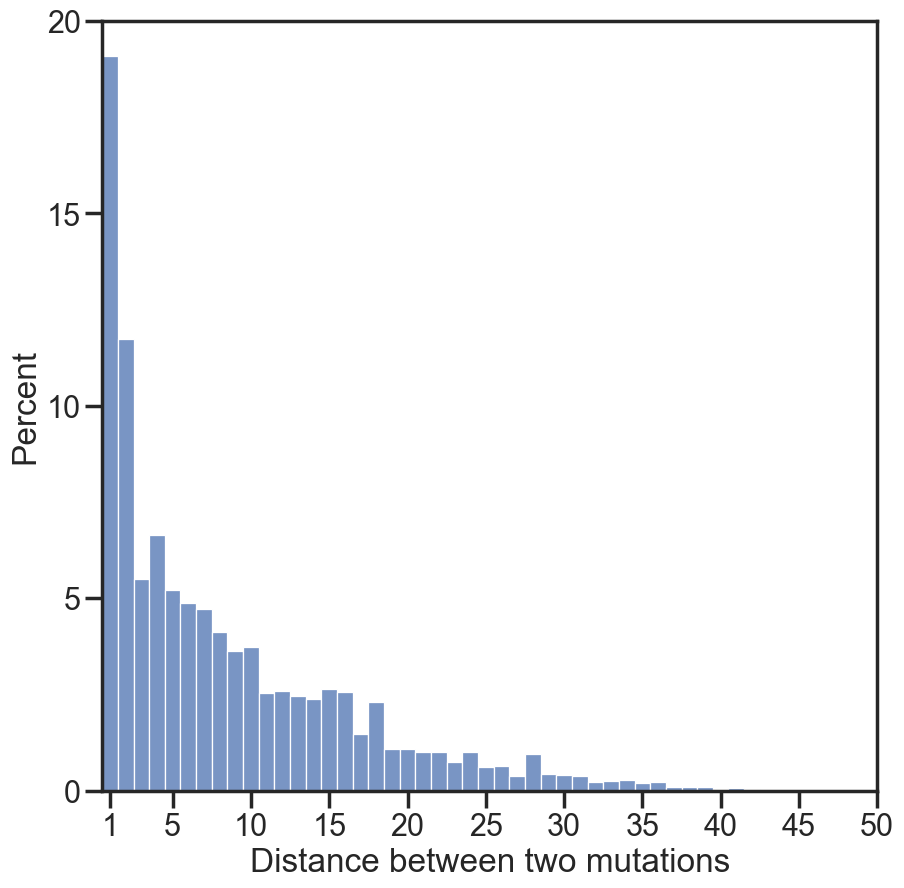

In [9]:
plt.rcParams['svg.fonttype'] = 'none'
plt.figure(figsize=(10,10))
sns.set_theme()
sns.set_context("poster")
sns.set_style('white')
sns.set_style('ticks')

ax=sns.histplot(x=distance_list,discrete=True,stat='percent')
# Create a list of x-ticks based on the bin edges
xticks = [1,5,10,15,20,25,30,35,40,45,50]
yticks = [0,5,10,15,20]


# Set the x-ticks
ax.set_xticks(xticks)
ax.set_yticks(yticks)

plt.xlabel('Distance between two mutations')
plt.ylim((0,20))
plt.xlim((0.5,50))
plt.savefig(f'Figures/General_Stats_Library/Distribution_Distance_between_Mutations.svg')
plt.savefig(f'Figures/General_Stats_Library/Distribution_Distance_between_Mutations.png',dpi=600)
plt.show()


### Number of mutations

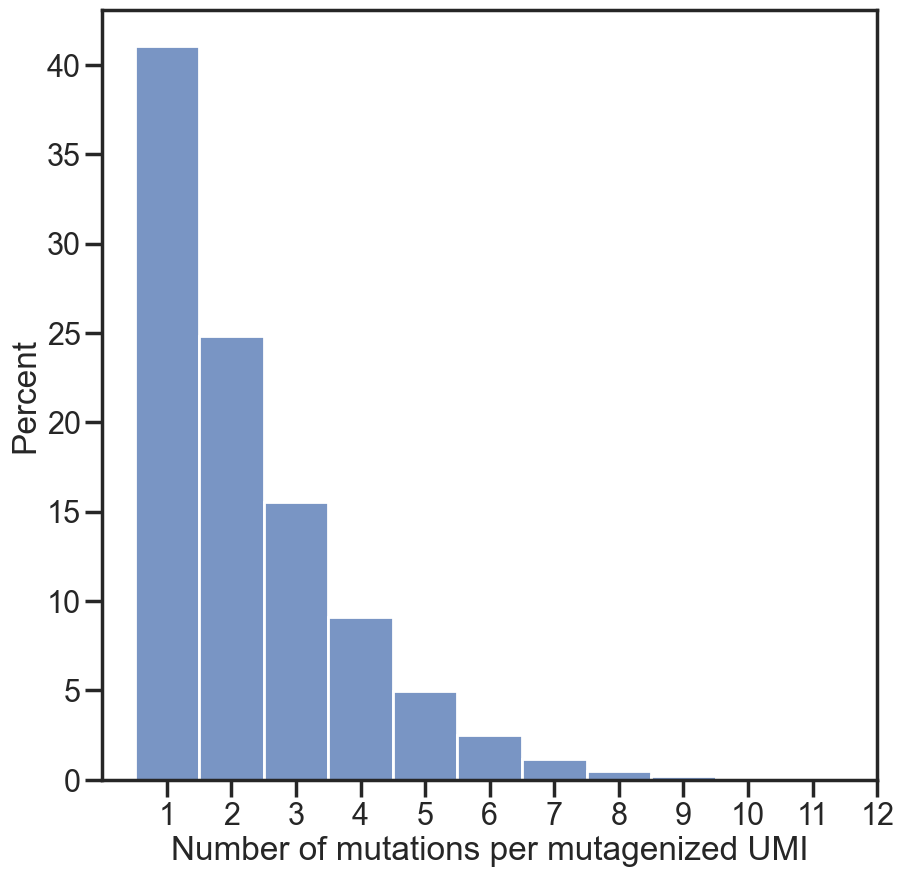

In [10]:
plt.rcParams['svg.fonttype'] = 'none'
# Count the Number of Mutations per genotype
df_unique_geno=df_muta_v2.drop_duplicates(subset=['TR','Genotype'],keep='first')
count_mutations_per_genotype=[]
for k,j in zip(df_unique_geno['Genotype'],df_unique_geno['UMI Count']):
    count_mutations_per_genotype.extend([len(k[0].split(','))]*j)
# count_mutations_per_genotype=[int(len(k.split(',')))*j ]

plt.figure(figsize=(10,10))
sns.set_theme()
sns.set_context("poster")
sns.set_style('white')
sns.set_style('ticks')
ax=sns.histplot(count_mutations_per_genotype,discrete=True,stat='percent')
plt.xlabel("Number of mutations per mutagenized UMI")
plt.xlim(0,12)
# Create a list of x-ticks based on the bin edges
xticks = np.arange(1, 12 + 1)

# # Set the x-ticks
ax.set_xticks(xticks)


# plt.title('Number of Mutations per genotype (100N)')
plt.savefig(f'Figures/General_Stats_Library/Distribution_Number_of_Mutations.svg')
plt.savefig(f'Figures/General_Stats_Library/Distribution_Number_of_Mutations.png',dpi=600)
plt.show()

